<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter4/clustCE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm clusterdata.*
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv

Python 3.7.12
--2021-11-08 08:44:24--  https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.github.com (raw.github.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv [following]
--2021-11-08 08:44:24--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4832 (4.7K) [text/plain]
Saving to: ‘clusterdata.csv’

clusterdata.csv     100%[===================>]   4.72K  --.-KB/s    in 0s      

2021-11-08 08:44:

# Example 4.9
## Import modules

In [2]:
import numpy as np
from numpy import genfromtxt
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

cutvalue  4.615660630025081


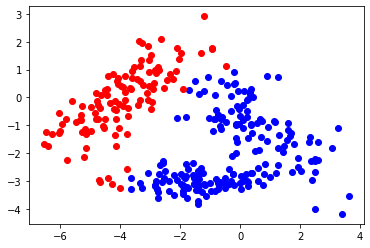

In [4]:
def S(x,D):
    V1 = np.where(x==0)[0] # {V1,V2} is the partition 
    V2 = np.where(x==1)[0]
    tmp = D[V1]
    tmp = tmp[:,V2]
    return np.mean(tmp) # the size of the cut

def maxcut(D,N,eps,rho,alpha):
    n = D.shape[1]
    Ne = int(rho*N)
    p = 1/2*np.ones(n) 
    p[0] = 1.0
    while (np.max(np.minimum(p,np.subtract(1,p))) > eps):
        x = np.array(np.random.uniform(0,1, (N,n))<=p, dtype=np.int64)
        sx = np.zeros(N)
        for i in range(N):
            sx[i] = S(x[i],D)
        
        sortSX = np.flip(np.argsort(sx))
        elIds = sortSX[0:Ne]
        elites = x[elIds]
        pnew = np.mean(elites, axis=0)
        p = alpha*pnew + (1.0-alpha)*p

    return np.round(p)

Xmat = genfromtxt('clusterdata.csv', delimiter=',')
n = Xmat.shape[0]

D = squareform(pdist(Xmat))
N = 1000
eps = 10**-2
rho = 0.1
alpha = 0.9

# CE
pout = maxcut(D,N,eps,rho, alpha);

cutval = S(pout,D)
print("cutvalue ",cutval)
#plot
V1 = np.where(pout==0)[0]
xblue = Xmat[V1]
V2 = np.where(pout==1)[0]
xred = Xmat[V2]
plt.scatter(xblue[:,0],xblue[:,1], c="blue")
plt.scatter(xred[:,0],xred[:,1], c="red")